In [46]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataSet = pd.read_csv('data/fahrzeiten_soll_ist_20190623_20190629.csv')
dataSet.head(5)

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,fahrweg_id,fw_no,fw_typ,fw_kurz,fw_lang,umlauf_von,halt_id_von,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach
0,12,1,27.06.19,3088,15,2,6232,0,FRAF07,27.06.19,...,100215,1,1,1,FRAF - BSTE,188822,373,588,47228,48855
1,12,1,27.06.19,3088,15,1,6232,3,FRAF07,27.06.19,...,100215,1,1,1,FRAF - BSTE,188822,373,373,48795,47228
2,12,1,27.06.19,3072,12,2,6232,0,FRAF07,27.06.19,...,100215,1,1,1,FRAF - BSTE,185773,373,588,47228,48855
3,12,1,27.06.19,3072,12,1,6232,3,FRAF07,27.06.19,...,100215,1,1,1,FRAF - BSTE,185773,373,373,48795,47228
4,12,1,27.06.19,3082,14,2,6232,0,FRAF07,27.06.19,...,100215,1,1,1,FRAF - BSTE,185480,373,588,47228,48855


In [8]:
stationDivaIds = dataSet.halt_diva_von.unique()
# for idx in stationDivaIds:
#     print('Station: ', idx, ' count: ', dataSet.loc[dataSet['halt_diva_von'] == idx].shape)
# filteredData = dataSet.loc[dataSet['fw_lang'] == 'FRAF - BSTE']
# filteredData.to_csv('data/filtered.csv', encoding='utf-8', index=False)

Filtering columns

In [119]:
ds = dataSet.loc[:, ['linie', 'richtung', 'halt_diva_von', 'datum_von', 'soll_an_von', 'ist_an_von', 'halt_diva_nach']]

ds.columns = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']

print('data shape: ', ds.shape)
ds.head(5)

data shape:  (1420407, 7)


,line,direction,station_diva_id,date,should_arrive_at,actually_arrived_at,next_station_diva_nach
0,12,1,6232,27.06.19,84618,84548,3027
1,12,1,6232,27.06.19,84540,84472,6232
2,12,1,6232,27.06.19,26058,26063,3027
3,12,1,6232,27.06.19,25980,25994,6232
4,12,1,6232,27.06.19,57618,57627,3027


In [120]:
targetStationId = 2572
ds = ds.loc[ds['station_diva_id'] == targetStationId]

print('data shape: ', ds.shape)

#Sort according to date
ds = ds.sort_values(by='date', ascending=True)
ds.head(5)

# fileToSave = 'data/generated/station_' + str(targetStationId) + '.csv'
# targetStationData.to_csv(fileToSave, encoding='utf-8', index=False)

data shape:  (10614, 7)


,line,direction,station_diva_id,date,should_arrive_at,actually_arrived_at,next_station_diva_nach
59211,11,1,2572,23.06.19,86352,86365,3034
66236,10,1,2572,23.06.19,27528,27510,2151
66235,10,1,2572,23.06.19,63624,63606,2151
66234,10,1,2572,23.06.19,77028,77056,2151
66233,10,1,2572,23.06.19,81528,81544,2151


Data types of the columns

In [105]:
ds.dtypes

line                       int64
direction                  int64
station_diva_id            int64
date                      object
should_arrive_at           int64
actually_arrived_at        int64
next_station_diva_nach     int64
dtype: object

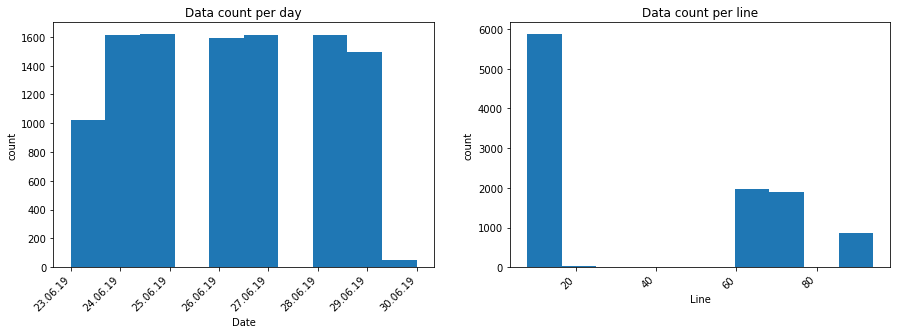

In [106]:
count_per_day = ds.groupby('date').count()

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
ax1.hist(ds.date)

ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
ax2.hist(ds.line);

In [121]:
features = ds;
features['date'] = pd.to_datetime(features['date'])
features['day_of_week'] = features['date'].dt.weekday

features['day'] = features['date'].dt.day
features['month'] = features['date'].dt.month
features['year'] = features['date'].dt.year

features = features.drop('date', axis = 1)
print(features.shape)
features.head()
# ds.day_of_week.unique()

(10614, 10)


,line,direction,station_diva_id,should_arrive_at,actually_arrived_at,next_station_diva_nach,day_of_week,day,month,year
59211,11,1,2572,86352,86365,3034,6,23,6,2019
66236,10,1,2572,27528,27510,2151,6,23,6,2019
66235,10,1,2572,63624,63606,2151,6,23,6,2019
66234,10,1,2572,77028,77056,2151,6,23,6,2019
66233,10,1,2572,81528,81544,2151,6,23,6,2019


In [109]:
# features = pd.get_dummies(features)
# print(features.shape)
# features.head()

In [122]:
# calculate delay time by subtracting y-x
#delays in sec --> y (target)
labels = features['actually_arrived_at'] - features['should_arrive_at']
features = features.drop('actually_arrived_at', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)
labels = np.array(labels)

In [123]:
print(features[:5])
print(labels[:5])

[[   11     1  2572 86352  3034     6    23     6  2019]
 [   10     1  2572 27528  2151     6    23     6  2019]
 [   10     1  2572 63624  2151     6    23     6  2019]
 [   10     1  2572 77028  2151     6    23     6  2019]
 [   10     1  2572 81528  2151     6    23     6  2019]]
[ 13 -18 -18  28  16]


In [125]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, random_state = 42
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8491, 9)
Training Labels Shape: (8491,)
Testing Features Shape: (2123, 9)
Testing Labels Shape: (2123,)


In [126]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [128]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 57.0 degrees.
Accuracy: -inf %.


/home/faizi/programs/anaconda3/envs/dps/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
